In [21]:
import pandas as pd
import xgboost as xgb
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [22]:
# Load and clean data
df = pd.read_csv("winequality-red.csv", delimiter=';', quotechar='"')
df.columns = df.columns.str.strip()


In [23]:
# Split features and target
X = df.drop("quality", axis=1)
y = df["quality"]

In [24]:
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Train XGBoost model
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [26]:
# Save trained model
joblib.dump(model, "wine_model.pkl")
print("✅ Model trained and saved to 'wine_model.pkl'")

✅ Model trained and saved to 'wine_model.pkl'


In [27]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📊 RMSE: {rmse:.2f}")
print(f"📈 R² Score: {r2:.2f}")


📊 RMSE: 0.59
📈 R² Score: 0.46


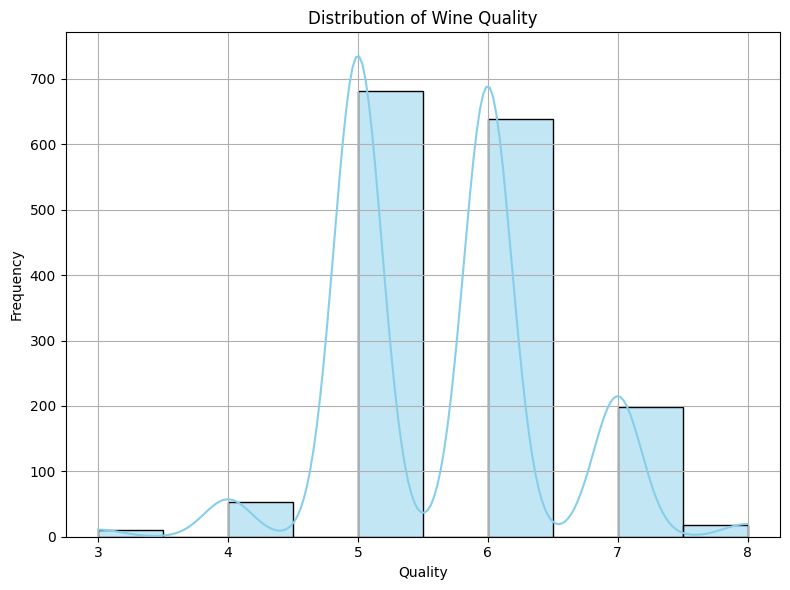

In [28]:
# 8. Plot 1: Distribution of Quality
plt.figure(figsize=(8, 6))
sns.histplot(df["quality"], bins=10, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


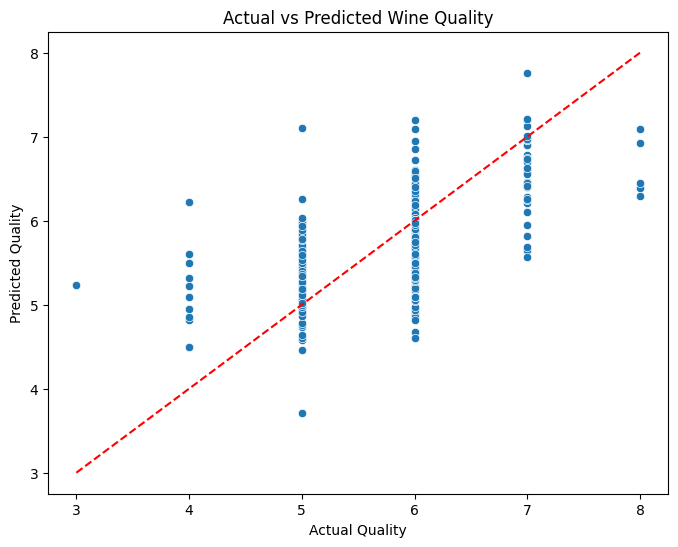

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
# 9. Plot Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.show()

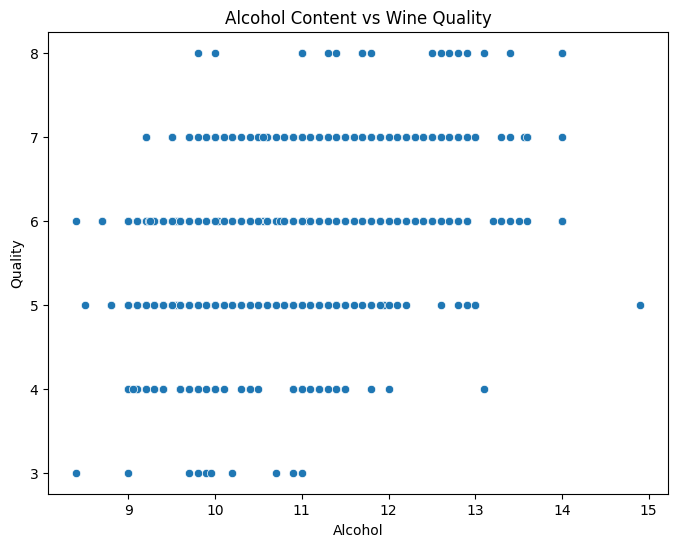

In [30]:
# 9. Plot 2: Alcohol vs Quality scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["alcohol"], y=df["quality"])
plt.title("Alcohol Content vs Wine Quality")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.show()

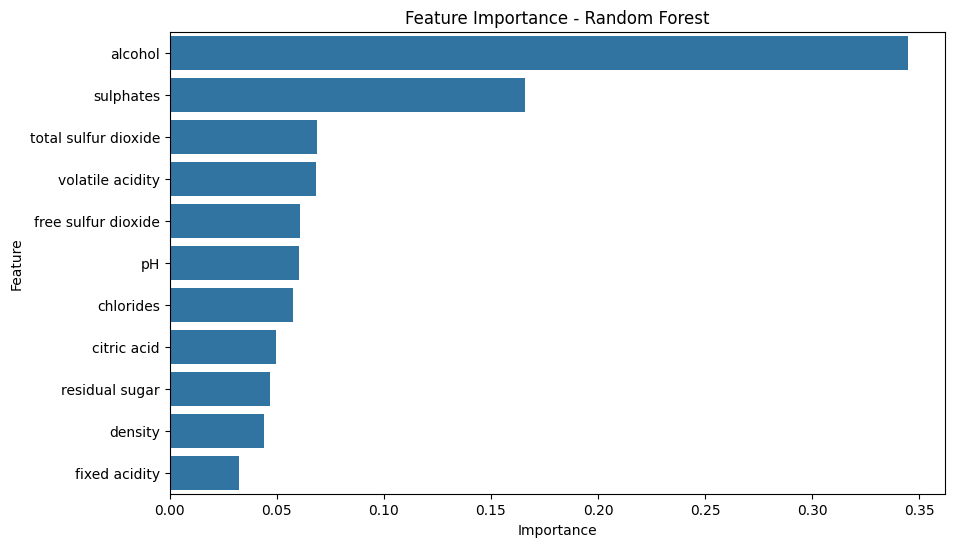

In [31]:
# 10. Plot 3: Feature Importance from Random Forest
importances = model.feature_importances_
features = X.columns
feature_imp_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_imp_df)
plt.title("Feature Importance - Random Forest")
plt.show()